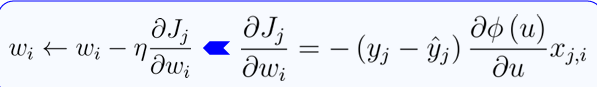
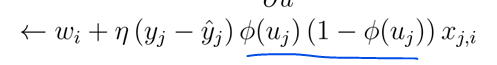

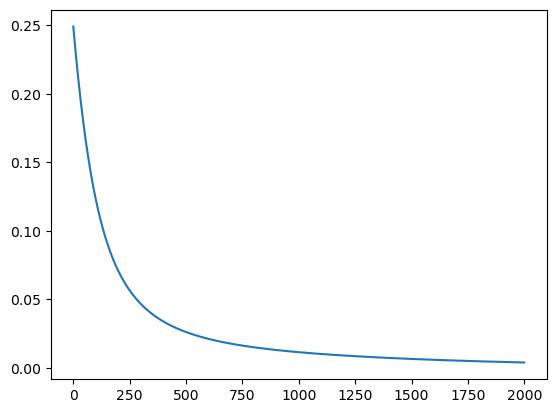

In [79]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.01
epoch = 2000
# w0 = np.random.uniform(-0.01,0.01)
# w1 = np.random.uniform(-0.01,0.01)
# w2 = np.random.uniform(-0.01,0.01)

# W = np.array([np.random.uniform(-0.01,0.01),np.random.uniform(-0.01,0.01),np.random.uniform(-0.01,0.01)])
W = np.array([0,0,0])
A = np.array([[1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

b = np.array([0,1,1,1])

error = []
for _ in range(epoch):
    for x, y in zip(A,b):
        u = x.dot(W)
        y_hat = 1/(1+np.exp(-u))
        W = W+(eta*(y-y_hat)*y_hat*(1-y_hat))*x
    error.append(np.mean((y-y_hat)**2))

plt.plot(error)

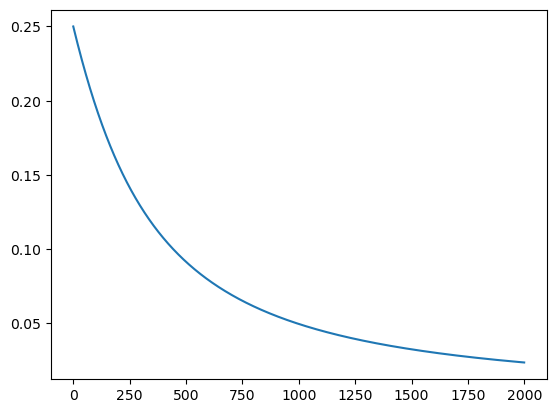

In [77]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.01
epoch = 2000
w0 = 0
w1 = 0
w2 = 0

# W = np.array([np.random.uniform(-0.01,0.01),np.random.uniform(-0.01,0.01),np.random.uniform(-0.01,0.01)])

X = np.array([[1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

y = np.array([0,1,1,1])

error = []
for _ in range(epoch):
    u = X[:,0]*w0 + X[:,1]*w1 + X[:,2]*w2
    y_hat = 1/(1+np.exp(-u))
    w0 = w0+(eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,0]
    w1 = w1+(eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,1]
    w2 = w2+(eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,2]
    error.append(np.mean((y-y_hat)**2))

plt.plot(error)

In [71]:
class LMS:
    def __init__(self, epoch=2000, eta=0.01):
        self.eta = eta
        self.epoch = epoch
        self.w0 = np.random.uniform(-0.01,0.01)
        self.w1 = np.random.uniform(-0.01,0.01)
        self.w2 = np.random.uniform(-0.01,0.01)
        
    def fit(self, X, y):
        for _ in range(self.epoch):
            u = X[:,0]*self.w0 + X[:,1]*self.w1 + X[:,2]*self.w2
            y_hat = 1/(1+np.exp(-u))
            self.w0 = self.w0+(self.eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,0]
            self.w1 = self.w1+(self.eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,1]
            self.w2 = self.w2+(self.eta*(y-y_hat)*y_hat*(1-y_hat))*X[:,2]
            error.append(np.mean((y-y_hat)**2))
    def predict_proba(self, X):
        u = X[:,0]*self.w0+X[:,1]*self.w1+X[:,2]*self.w2
        y_hat = 1/(1+np.exp(-u))
        return y_hat
    def predict(self, X):
        return (self.predict_proba(X)>=0.5).astype(int)

In [72]:
X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([0,1,1,1])

model = LMS()
model.fit(X, y)
print(model.predict_proba(X))
print(model.predict(X))

[0.20727837 0.85981037 0.85988845 0.88935831]
[0 1 1 1]


In [59]:
class LMS_test:
    def __init__(self, epoch=2000, eta=0.01):
        self.eta = eta
        self.epoch = epoch
        self.W = np.array([np.random.uniform(-0.01,0.01), 
                           np.random.uniform(-0.01,0.01), 
                           np.random.uniform(-0.01,0.01),
                           np.random.uniform(-0.01,0.01)
                           ])
        
    def fit(self, A, b):
        for _ in range(self.epoch):
            for x,y in zip(A,b):
                u = x.dot(self.W)
                y_hat = 1/(1+np.exp(-u))
                self.w = self.W+(self.eta*(y-y_hat)*y_hat*(1-y_hat))*x

            error.append(np.mean((y-y_hat)**2))
            
    def predict_proba(self, X):
        u = X.dot(self.W)
        y_hat = 1/(1+np.exp(-u))
        return y_hat
    
    def predict(self, X):
        return (self.predict_proba(X)>=0.5).astype(int)

In [60]:
#Challenge !!!!
X = np.array([
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])
y = np.array([0, 1, 1, 1, 1, 1, 1, 1])

model = LMS_test()
model.fit(X, y)
print(model.predict_proba(X))
print(model.predict(X))

[0.49974929 0.50028659 0.50222363 0.50276092 0.50182808 0.50236537
 0.50430234 0.5048396 ]
[0 1 1 1 1 1 1 1]
